# Section 1: Introduction

# Random Forest Tutorial: A Hands-On Guide
## Objectives:
1. Understand the Random Forest algorithm.
2. Learn how to apply Random Forest to a dataset.
3. Explore performance metrics and interpret the results.
4. Perform hyperparameter tuning for optimization.
5. Analyze feature importance and visualize results.

## What is Random Forest?
Random Forest is an ensemble learning method that combines multiple decision trees to improve classification or regression performance. It reduces overfitting and increases accuracy compared to single decision trees.



# Section 2: Importing Libraries


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Section 3: Loading and Exploring the Dataset

## Dataset: Iris
We use the Iris dataset, a classic in machine learning, with 4 features representing flower measurements.


In [27]:
from sklearn.datasets import load_iris
data = load_iris()

# Converting dataset into a DataFrame for better readability
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Preview the dataset
print("Dataset Preview:")
print(X.head())

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [28]:
print("\nTarget Classes and Their Corresponding Labels:")
for i, class_name in enumerate(data.target_names):
    print(f"{i}: {class_name}")



Target Classes and Their Corresponding Labels:
0: setosa
1: versicolor
2: virginica


In [29]:
# Check for missing values
print("\nAre there any missing values?")
print(X.isnull().sum())


Are there any missing values?
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


# Section 4: Splitting the Dataset

## Train-Test Split
We split the dataset into 70% training and 30% testing to evaluate model performance.


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the sizes of the datasets
print(f"\nTraining Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")




Training Samples: 105
Testing Samples: 45


# Section 5: Building a Baseline Random Forest Model

## Baseline Random Forest Model
We use the default parameters for our first Random Forest model to set a baseline for performance.


In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate baseline performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBaseline Accuracy: {accuracy * 100:.2f}%")


Baseline Accuracy: 88.89%


In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



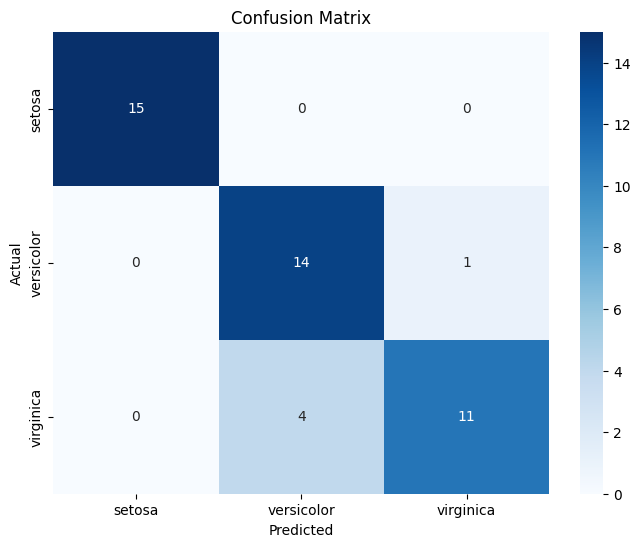

In [34]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Section 6: Hyperparameter Tuning

## Hyperparameter Tuning
We use GridSearchCV to find the optimal parameters for our Random Forest model.


In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Print the best parameters
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters from GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [36]:
# Train with the best parameters
optimized_rf = grid_search.best_estimator_
optimized_rf.fit(X_train, y_train)

# Predict on test data with optimized model
optimized_y_pred = optimized_rf.predict(X_test)

# Evaluate performance
optimized_accuracy = accuracy_score(y_test, optimized_y_pred)
print(f"\nOptimized Model Accuracy: {optimized_accuracy * 100:.2f}%")


Optimized Model Accuracy: 88.89%


# Section 7: Feature Importance Analysis

## Feature Importance
Random Forest provides insight into which features are most important for the model's decisions.


In [37]:
feature_importances = optimized_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

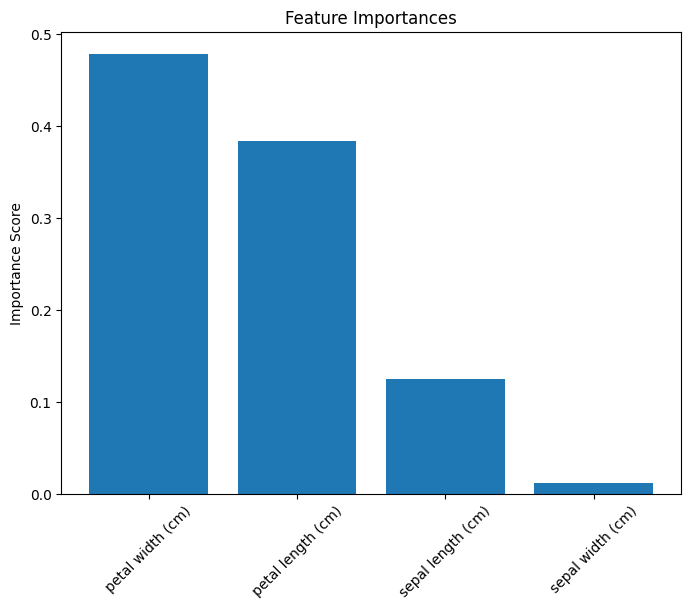

In [38]:

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=45)
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.show()


# Section 8: Visualizing Decision Boundaries

## Visualizing Decision Boundaries
For a better understanding of the model, we visualize decision boundaries (using 2 features).


In [39]:
# Select only two features for visualization
X_visual = X.iloc[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visual, y, test_size=0.3, random_state=42)

rf_visual = RandomForestClassifier(n_estimators=100, random_state=42)
rf_visual.fit(X_train_vis, y_train_vis)

RandomForestClassifier(random_state=42)

In [40]:
# Create a mesh grid
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = rf_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\sabih.rehman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


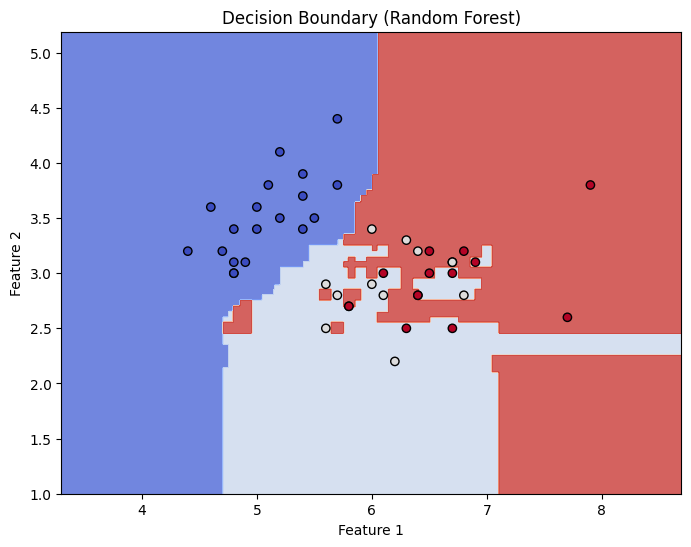

In [41]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_test_vis.iloc[:, 0], X_test_vis.iloc[:, 1], c=y_test_vis, edgecolors="k", cmap="coolwarm")
plt.title("Decision Boundary (Random Forest)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Section 8: Model Evaluation

## Comparing Baseline and Optimized Random Forest Models

After building the baseline model and tuning the Random Forest hyperparameters, we evaluate and compare their performance. Metrics used for the comparison include:
- **Accuracy**: Overall percentage of correctly classified samples.
- **Precision**: The proportion of positive identifications that were actually correct, calculated for each class (Setosa, Versicolor, Virginica).
- **Recall**: The proportion of actual positives that were correctly identified, calculated for each class.


In [42]:
# Recalculate metrics for Baseline Model
baseline_accuracy = accuracy_score(y_test, y_pred) * 100
baseline_precision = precision_score(y_test, y_pred, average=None) * 100
baseline_recall = recall_score(y_test, y_pred, average=None) * 100

# Recalculate metrics for Optimized Model
optimized_accuracy = accuracy_score(y_test, optimized_y_pred) * 100
optimized_precision = precision_score(y_test, optimized_y_pred, average=None) * 100
optimized_recall = recall_score(y_test, optimized_y_pred, average=None) * 100

# Creating a comparison table
comparison_data = {
    "Metric": [
        "Accuracy",
        "Precision (Setosa)",
        "Recall (Setosa)",
        "Precision (Versicolor)",
        "Recall (Versicolor)",
        "Precision (Virginica)",
        "Recall (Virginica)"
    ],
    "Baseline Model (%)": [
        baseline_accuracy,
        baseline_precision[0],
        baseline_recall[0],
        baseline_precision[1],
        baseline_recall[1],
        baseline_precision[2],
        baseline_recall[2],
    ],
    "Optimized Model (%)": [
        optimized_accuracy,
        optimized_precision[0],
        optimized_recall[0],
        optimized_precision[1],
        optimized_recall[1],
        optimized_precision[2],
        optimized_recall[2],
    ],
}

# Creating the DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Displaying the DataFrame
print("Baseline vs Optimized Random Forest Metrics")
print(comparison_df)


Baseline vs Optimized Random Forest Metrics
                   Metric  Baseline Model (%)  Optimized Model (%)
0                Accuracy           88.888889            88.888889
1      Precision (Setosa)          100.000000           100.000000
2         Recall (Setosa)          100.000000           100.000000
3  Precision (Versicolor)           77.777778            77.777778
4     Recall (Versicolor)           93.333333            93.333333
5   Precision (Virginica)           91.666667            91.666667
6      Recall (Virginica)           73.333333            73.333333


# Section 9: Conclusion

# Conclusion
- Random Forest is a powerful ensemble learning technique.
- Hyperparameter tuning can significantly improve performance.
- Feature importance analysis highlights the most influential features.
- Visualization helps to interpret model behavior.